# 使用预训练好的```segmentation.fcn_resnet101()```网络

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import torch
from torchvision import transforms
import torchvision

# 拿出预训练网络```segmentation.fcn_resnet101()```

In [2]:
model=torchvision.models.segmentation.fcn_resnet101(pretrained=True)
model.eval()  # 不进行训练

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FCN_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=FCN_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [3]:
image = PIL.Image.open("./2012_004308.jpg")
# 照片预处理, 到0-1之间，标准化处理
image_transf=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])
image_tensor=image_transf(image).unsqueeze(0)

# 输入网络
output=model(image_tensor)["out"]

# 将输出转化为二维图像
outputarg=torch.argmax(output.squeeze(),dim=0).numpy()
outputarg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## 定义一个函数，可以为每一个类别的像素涂上不同的颜色

In [4]:
def decode_segmaps(image,label_colors,nc=21):  # nc: num of classes
    """函数将输出的二维图像,会将不同的类编码为不同的颜色"""
    r=np.zeros_like(image).astype(np.uint8)
    g=np.zeros_like(image).astype(np.uint8)
    b=np.zeros_like(image).astype(np.uint8)
    for cla in range(nc):
        idx=image==cla  # mask
        # 分别用预设颜色填充三个通道
        r[idx]=label_colors[cla,0]
        g[idx]=label_colors[cla,1]
        b[idx]=label_colors[cla,2]
    rgb_image=np.stack([r,g,b],axis=2)
    return rgb_image

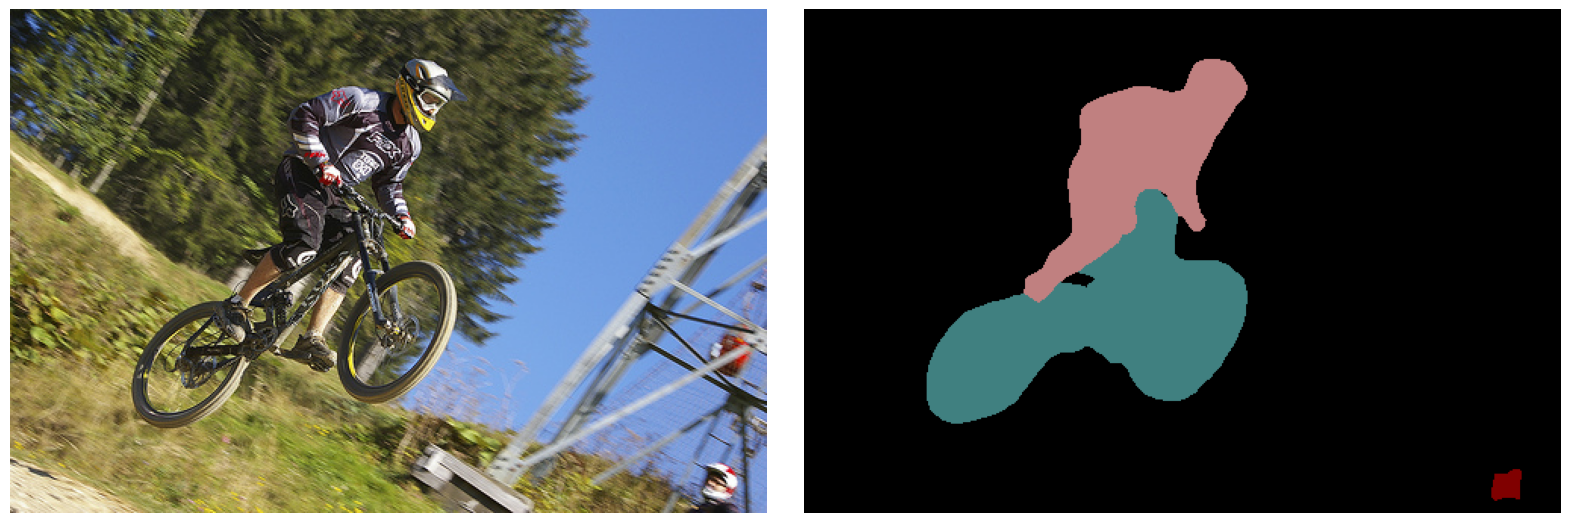

In [5]:
# 定义颜色
label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

output_rgb=decode_segmaps(outputarg,label_colors)

# 准备显示
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.imshow(image)  # 原始图像
plt.axis("off")

plt.subplot(122)
plt.imshow(output_rgb)
plt.axis("off")

plt.subplots_adjust(wspace=0.05)

plt.show()